In [3]:
import bagpy
from bagpy import bagreader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#load bag and extract topics
b = bagreader('/home/ali-7800/bagfiles/forward_8steps.bag')

# replace the topic name as per your need
Fl = b.message_by_topic('/robotis/sensor/ft_left_foot/scaled')
df_Fl = pd.read_csv(Fl)
Fr = b.message_by_topic('/robotis/sensor/ft_right_foot/scaled')
df_Fr = pd.read_csv(Fr)
pose = b.message_by_topic('/robotis/walking/robot_pose')
df_pose = pd.read_csv(pose)
Fly = df_Fl["wrench.force.y"]
Flx = df_Fl["wrench.force.x"]
Tly = df_Fl["wrench.torque.y"]
Tlx = df_Fl["wrench.torque.x"]
Flz = df_Fl["wrench.force.z"]

Fry = df_Fr["wrench.force.y"]
Frx = df_Fr["wrench.force.x"]
Frz = df_Fr["wrench.force.z"]
Try = df_Fl["wrench.torque.y"]
Trx = df_Fl["wrench.torque.x"]
d = 25/1000
Time = df_pose["Time"]
Time = Time - Time[0]
poslx = df_pose["global_to_left_foot.position.x"]
posly = df_pose["global_to_left_foot.position.y"]
posrx = df_pose["global_to_right_foot.position.x"]
posry = df_pose["global_to_right_foot.position.y"]
Plx = (Tly-Flx*d)/Flz
Prx = (Try-Frx*d)/Frz#df_pose["global_to_right_foot.position.x"]
Ply = (Tlx-Fly*d)/Flz#df_pose["global_to_left_foot.position.y"]
Pry = (Trx-Fry*d)/Frz#df_pose["global_to_right_foot.position.y"]
PCoMx = df_pose["global_to_center_of_body.position.x"]
PCoMy = df_pose["global_to_center_of_body.position.y"]

ZMPx = ((Plx)*Flz+(Prx)*Frz)/(Flz+Frz)
ZMPy = ((Ply-PCoMy)*Flz+(Pry-PCoMy)*Frz)/(Flz+Frz)




[INFO]  Data folder /home/ali-7800/bagfiles/forward_8steps already exists. Not creating.


Text(0, 0.5, 'X [m]')

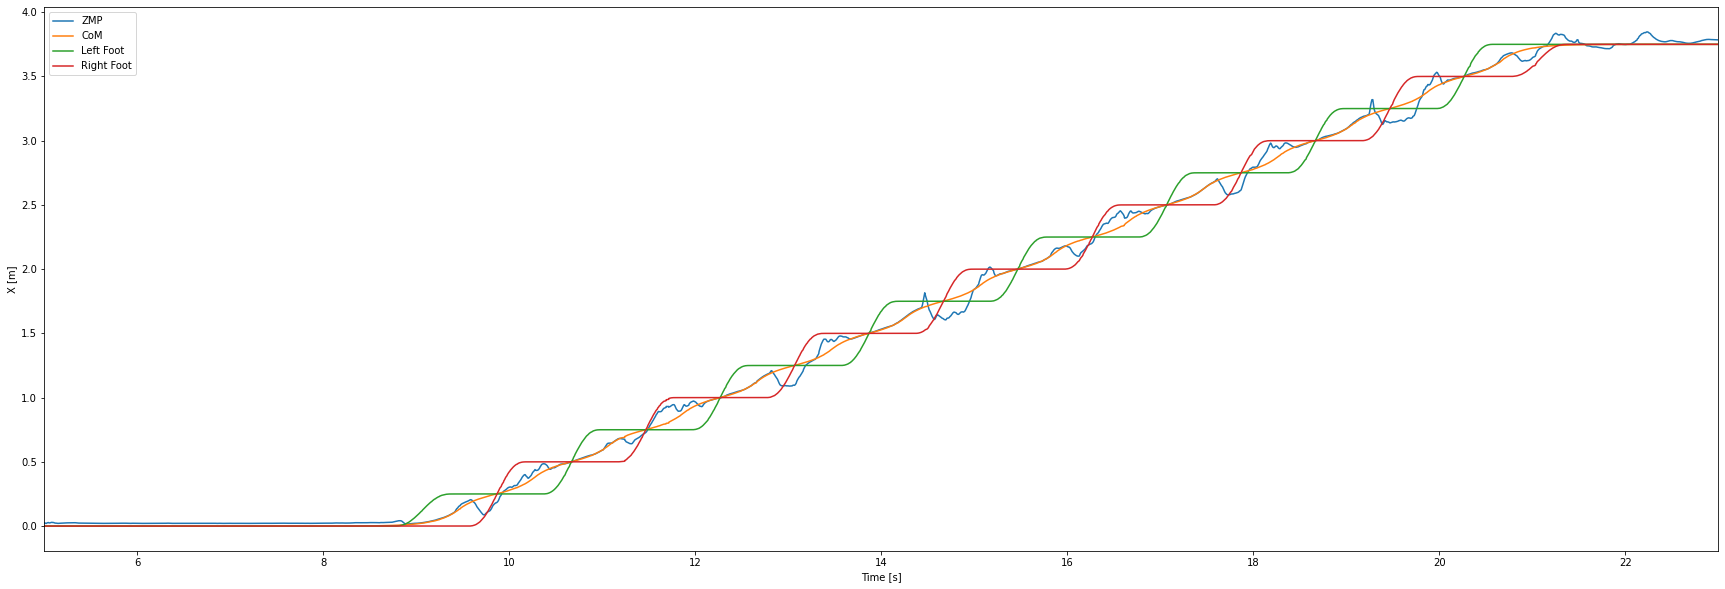

In [5]:
#plot ZMP vs CoM in x-direction
X = {'time':Time,'ZMP': ZMPx, 'CoM': PCoMx,"Left Foot":poslx,"Right Foot":posrx}
df_x = pd.DataFrame(data=X)
#df_x = df_x.iloc[2600:3700]
ax = df_x.plot(x="time",figsize=(30, 10),xlim=(5,23))
ax.set_xlabel("Time [s]")
ax.set_ylabel("X [m]")

Text(0, 0.5, 'Y [m]')

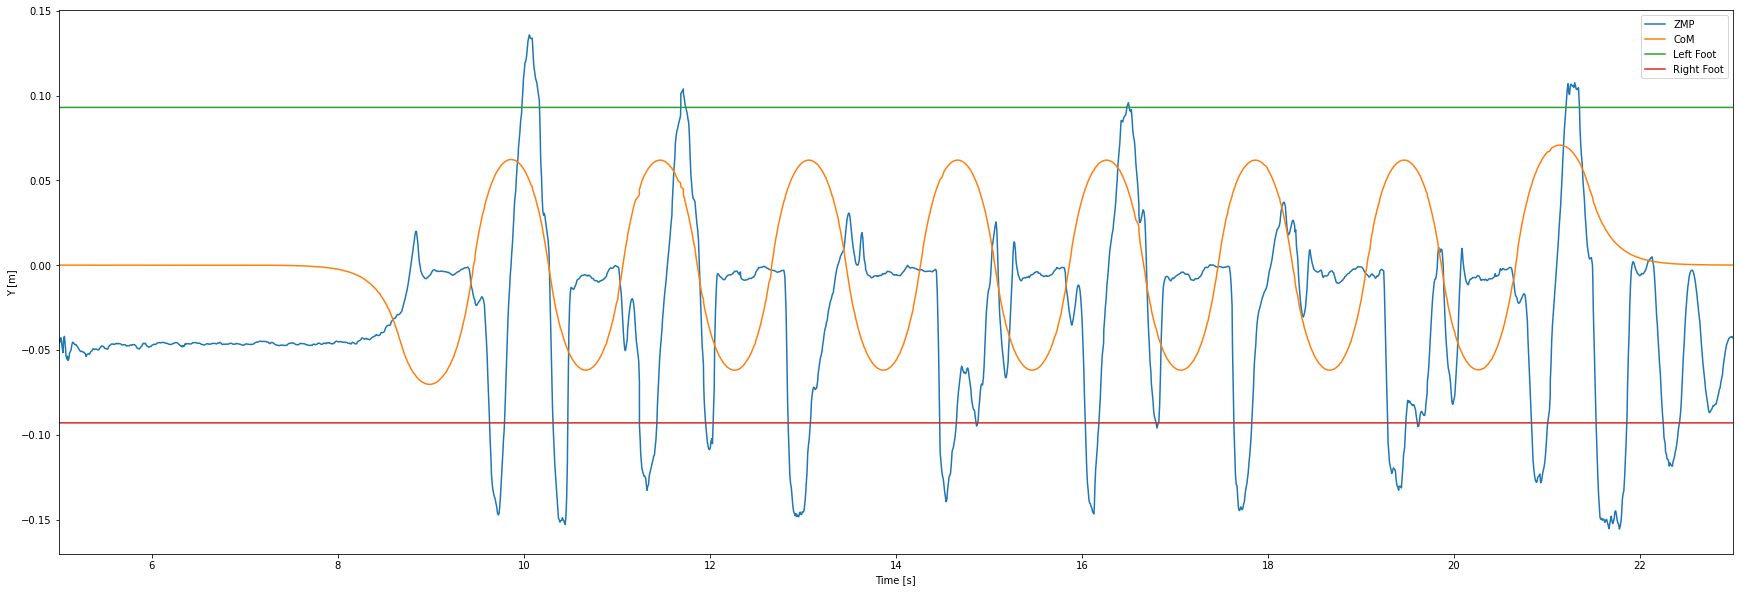

In [8]:
#plot ZMP vs CoM in y-direction
Y = {'time':Time,'ZMP': ZMPy, 'CoM': PCoMy,"Left Foot":Ply,"Right Foot":Pry}
df_y = pd.DataFrame(data=Y)
#df_y = df_y.iloc[2600:3700]
ay = df_y.plot(x="time",figsize=(30, 10),xlim=(5,23))
ay.set_xlabel("Time [s]")
ay.set_ylabel("Y [m]")


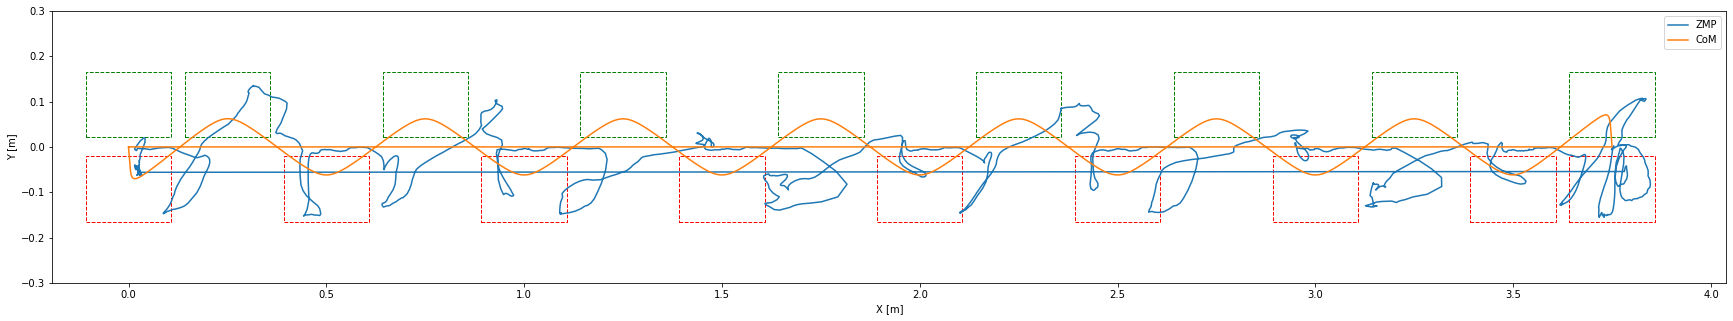

In [10]:
#plot ZMP vs CoM in x and y directions
XY = {'x': ZMPx, 'ZMP':ZMPy}
df_xy = pd.DataFrame(data=XY)
#df_xy = df_xy.iloc[2600:3700]
XYCoM = {'x': PCoMx, 'CoM':PCoMy}
df_xyCoM = pd.DataFrame(data=XYCoM)
#df_xyCoM = df_xyCoM.iloc[2600:3700]
axy = df_xy.plot(x="x",y="ZMP",ylim=(-0.3,0.3),figsize=(30, 5))
axy.set_xlabel("X [m]")
axy.set_ylabel("Y [m]")
bxy = df_xyCoM.plot(ax=axy,x="x",y="CoM")
bxy.set_xlabel("X [m]")

for i in range(7):
    left, bottom, width, height = (0.25+0.5*i-(0.216/2), 0.093036-(0.144/2), 0.216, 0.144)
    rect=mpatches.Rectangle((left,bottom),width,height, 
                            fill=False,
                            alpha=1,
                        color="green",
                        ls = "--")
    plt.gca().add_patch(rect)
    left, bottom, width, height = (0.5+0.5*i-(0.216/2), -0.093036-(0.144/2), 0.216, 0.144)
    rect=mpatches.Rectangle((left,bottom),width,height, 
                            fill=False,
                            alpha=1,
                        color="red",
                        ls = "--")
    plt.gca().add_patch(rect)

left, bottom, width, height = (-(0.216/2), 0.093036-(0.144/2), 0.216, 0.144)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        alpha=1,
                    color="green",
                    ls = "--")
plt.gca().add_patch(rect)
left, bottom, width, height = (-(0.216/2), -0.093036-(0.144/2), 0.216, 0.144)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        alpha=1,
                    color="red",
                    ls = "--")
plt.gca().add_patch(rect)

left, bottom, width, height = (3.75-(0.216/2), 0.093036-(0.144/2), 0.216, 0.144)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        alpha=1,
                    color="green",
                    ls = "--")
plt.gca().add_patch(rect)
left, bottom, width, height = (3.75-(0.216/2), -0.093036-(0.144/2), 0.216, 0.144)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        alpha=1,
                    color="red",
                    ls = "--")
plt.gca().add_patch(rect)
